# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [2]:
x=torch.tensor([[0,1,2,3],
           [4,5,6,7],
           [8,9,10,11]])
y=torch.tensor([[12,13,14,15],
          [16,17,18,19],
          [20,21,22,23]])

In [3]:
# 행으로 병합 코드
torch.cat((x,y), dim=0)
torch.concat((x,y), dim=0)
torch.vstack((x,y))
torch.row_stack((x,y))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])

In [4]:
# 열로 병합 코드
torch.cat((x,y), dim=1)
torch.concat((x,y), dim=1)
torch.hstack((x,y))
torch.column_stack((x,y))

tensor([[ 0,  1,  2,  3, 12, 13, 14, 15],
        [ 4,  5,  6,  7, 16, 17, 18, 19],
        [ 8,  9, 10, 11, 20, 21, 22, 23]])

참고: https://rfriend.tistory.com/781



### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

In [6]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [8]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5071, 0.0602]) 
label: tensor([6.9327])


In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.0407, -0.4409],
        [ 0.7022, -0.1188],
        [-1.7817,  0.0624],
        [ 1.4326, -0.4631],
        [-0.8483,  0.1570],
        [-1.1318, -0.5722],
        [ 0.1579, -0.8677],
        [ 1.2163,  0.6299],
        [-0.0143,  0.4118],
        [ 0.6238,  0.6888],
        [ 1.2838,  0.0426],
        [-0.3819, -0.3899],
        [ 1.3622,  0.4350],
        [-0.7465, -0.6004],
        [-0.2444,  0.4831],
        [ 1.0845,  0.6421],
        [ 1.3647,  0.6697],
        [-0.7809,  0.6533],
        [ 3.2396,  1.4488],
        [-1.7378,  2.1311]]) 
 tensor([[ 3.0428],
        [ 7.7964],
        [ 0.0571],
        [10.5025],
        [ 2.6922],
        [ 2.9575],
        [ 7.2604],
        [ 8.2124],
        [ 4.8254],
        [ 6.3291],
        [ 9.2984],
        [ 4.9394],
        [ 8.9311],
        [ 4.1718],
        [ 4.0521],
        [ 7.7980],
        [ 8.5943],
        [ 2.1789],
        [13.0562],
        [-2.9125]])


In [11]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
#원하는 실수를 넣어주세요
b = torch.tensor([0.5], requires_grad=True) # 옵션 없어도

In [12]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w)+b ###lr func 코드 완성하기

In [13]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat-y)**2) ###loss function 직접 짜보기 (y_hat-y)^2?

In [14]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          # 초기화?
            param -= lr * param.grad / batch_size
            param.grad.zero_() #check

In [15]:
lr = 0.01###직접 설정
num_epochs = 100###직접 설정
net = linreg###위에서 가져오기
loss = squared_loss###위에서 가져오기

w_values = []
loss_values = []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) ###채우기 완료
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) ###채우기 완료 check
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        w_values.append(w[0].item())
        loss_values.append(train_l.item())
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 29.582438
epoch 2, loss 24.240215
epoch 3, loss 19.863668
epoch 4, loss 16.278065
epoch 5, loss 13.340344
epoch 6, loss 10.933336
epoch 7, loss 8.961084
epoch 8, loss 7.344944
epoch 9, loss 6.020584
epoch 10, loss 4.935289
epoch 11, loss 4.045820
epoch 12, loss 3.316848
epoch 13, loss 2.719362
epoch 14, loss 2.229635
epoch 15, loss 1.828197
epoch 16, loss 1.499125
epoch 17, loss 1.229349
epoch 18, loss 1.008185
epoch 19, loss 0.826853
epoch 20, loss 0.678175
epoch 21, loss 0.556268
epoch 22, loss 0.456305
epoch 23, loss 0.374329
epoch 24, loss 0.307102
epoch 25, loss 0.251966
epoch 26, loss 0.206745
epoch 27, loss 0.169654
epoch 28, loss 0.139229
epoch 29, loss 0.114270
epoch 30, loss 0.093793
epoch 31, loss 0.076995
epoch 32, loss 0.063211
epoch 33, loss 0.051902
epoch 34, loss 0.042623
epoch 35, loss 0.035006
epoch 36, loss 0.028757
epoch 37, loss 0.023627
epoch 38, loss 0.019417
epoch 39, loss 0.015961
epoch 40, loss 0.013124
epoch 41, loss 0.010796
epoch 42, loss 0.00

In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0004, -0.0003], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0002], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

In [17]:
import matplotlib.pyplot as plt

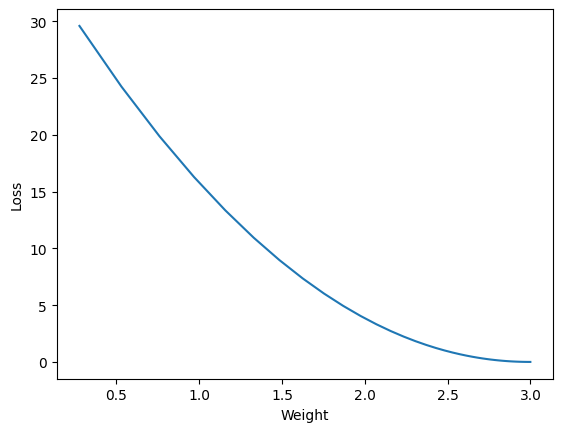

In [18]:
plt.plot(w_values, loss_values)
plt.xlabel('Weight')
plt.ylabel('Loss')

plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [19]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [20]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [21]:
next(iter(data_iter))

[tensor([[ 0.3722,  1.0795],
         [-0.5131, -0.2622],
         [-0.0702, -0.3266],
         [-0.6738, -1.0053],
         [ 2.0101,  0.0981],
         [ 0.1968,  1.8071],
         [ 0.1285,  0.6966],
         [ 2.2340,  0.0559],
         [ 1.2946,  1.0453],
         [-0.2175, -0.2760],
         [-1.5443,  0.3388],
         [-1.2621, -0.2413],
         [ 0.9968,  1.1080],
         [ 0.8457,  1.1176],
         [ 0.6195, -1.2468],
         [ 0.7027,  1.2293],
         [-0.8526,  0.1957],
         [ 0.3765,  0.2633],
         [-1.6619, -1.9280],
         [-0.8016, -0.0535]]),
 tensor([[ 5.0050],
         [ 4.3536],
         [ 5.7767],
         [ 4.9808],
         [11.3954],
         [ 3.3825],
         [ 4.8360],
         [12.1174],
         [ 7.8199],
         [ 5.2670],
         [ 0.3677],
         [ 2.0694],
         [ 6.8176],
         [ 6.3668],
         [ 9.2241],
         [ 5.7627],
         [ 2.6401],
         [ 6.2432],
         [ 3.4097],
         [ 3.1850]])]

In [22]:
from torch import nn as nn

In [46]:
net = nn.Sequential(
    nn.Linear(2, 20),
    nn.Linear(20,1)
) #아래에서 행렬곱 가능하도록 2x20

### net = nn.Sequential(nn.Linear(10, 5),nn.ReLU(),nn.Linear(5, 1))

In [47]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
loss = nn.MSELoss()###api function으로 직접 설정

In [49]:
import torch.optim as tr

In [50]:
trainer = tr.SGD(net.parameters(), lr=0.01)

In [51]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        ### l = loss(###직접설정)
        l = loss(net(X), y) #행렬곱 가능하도록
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000095
epoch 2, loss 0.000096
epoch 3, loss 0.000095


In [53]:
w = net[0].weight.data  ###학습결과 w 구하는 식
print(w)
b = net[0].bias.data ###학습결과 b 구하는 식
print(b)

tensor([[-0.2786,  0.1183],
        [-0.0654,  0.0385],
        [ 0.4826, -0.2611],
        [ 0.3958, -0.1928],
        [-0.3375,  0.1628],
        [ 0.2154, -0.1082],
        [ 0.3323, -0.1769],
        [ 0.1938, -0.0822],
        [ 0.4050, -0.1977],
        [-0.3205,  0.1756],
        [ 0.1536, -0.0765],
        [-0.2485,  0.1095],
        [-0.3395,  0.1699],
        [-0.5010,  0.2481],
        [ 0.0634, -0.0318],
        [-0.1758,  0.0740],
        [-0.1130,  0.0697],
        [ 0.2548, -0.1192],
        [-0.0026,  0.0035],
        [ 0.3602, -0.1883]])
tensor([-0.3362, -0.0962,  0.6204,  0.5076, -0.4344,  0.2582,  0.4316,  0.2435,
         0.5071, -0.3964,  0.1874, -0.3192, -0.4435, -0.6328,  0.0605, -0.2127,
        -0.1337,  0.3037, -0.0215,  0.4694])
